# Exploring and Transforming JSON Schemas

Here, we will learn how to navigate through a JSON file whose schema is unkown to us

In [165]:
# Import and load
import json
with open(r"C:\Users\nrmmw\Documents\Flatiron\dsc-exploring-and-transforming-json-schemas\output.json") as f:
    data = json.load(f)

In [166]:
# Get data type at Level 1
type(data)

dict

In [167]:
# Exploring Level 2
data.keys()

dict_keys(['albums'])

In [168]:
# Data type for Level 2
type(data['albums'])

dict

In [169]:
# Exploring Level 3
data['albums'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [170]:
# Getting datatypes for Level 3
for key in data['albums'].keys():
    print(key, type(data['albums'][key]))

href <class 'str'>
items <class 'list'>
limit <class 'int'>
next <class 'str'>
offset <class 'int'>
previous <class 'NoneType'>
total <class 'int'>


In [171]:
# Lets get into the items-list. The others are in their final
print(type(data['albums']['items']))
print(len(data['albums']['items']))

<class 'list'>
2


In [172]:
# The list items goes further into a dictionary
type(data['albums']['items'][0])

dict

In [173]:
# Keys of the dictionary in the list called items
data['albums']['items'][0].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'type', 'uri'])

**Converting JSON to Pandas**

In [174]:
import pandas as pd
df = pd.DataFrame(data['albums']['items'])
df
#This won't help much here as it works better with fairly flat tabular data

,album_type,artists,available_markets,external_urls,href,id,images,name,type,uri
0,single,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",{'spotify': 'https://open.spotify.com/album/5Z...,https://api.spotify.com/v1/albums/5ZX4m5aVSmWQ...,5ZX4m5aVSmWQ5iHAPQpT71,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Runnin',album,spotify:album:5ZX4m5aVSmWQ5iHAPQpT71
1,single,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AR, AT, AU, BE, BG, BO, BR, CH, CL, CO, C...",{'spotify': 'https://open.spotify.com/album/0g...,https://api.spotify.com/v1/albums/0geTzdk2Inlq...,0geTzdk2InlqIoB16fW9Nd,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Sneakin’,album,spotify:album:0geTzdk2InlqIoB16fW9Nd


**Extracting Data**

Now that we have some sense of what is in our dataset, we can extract some information that might be useful as part of a larger analysis.

#### What are the artist names?

In [175]:
#Get artist names:
first_album = data['albums']['items'][0]

first_album['artists']
# This is a list of dictionaries

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/2RdwBSPQiwcmiDo9kixcl8'},
  'href': 'https://api.spotify.com/v1/artists/2RdwBSPQiwcmiDo9kixcl8',
  'id': '2RdwBSPQiwcmiDo9kixcl8',
  'name': 'Pharrell Williams',
  'type': 'artist',
  'uri': 'spotify:artist:2RdwBSPQiwcmiDo9kixcl8'}]

In [176]:
#Let's convert it into a list of strings
first_album_artists = [artist['name'] for artist in first_album['artists']]
first_album_artists

['Pharrell Williams']

In [177]:
# 3 Let us get for all album items
artist_names = []
album_artists = []
for album in data['albums']['items']:
    for artist in album["artists"]:
        artist_names.append(artist['name'])
        
artist_names

['Pharrell Williams', 'Drake']

In [178]:
#Using pandas
df['artists'].apply(lambda artists: [artist['name'] for artist in artists])

0    [Pharrell Williams]
1                [Drake]
Name: artists, dtype: object

#### How many available markets are there per album?

In [179]:
df['available_markets'].apply(len)

0    60
1    57
Name: available_markets, dtype: int64

#### What is the medium-sized image associated with each album?

Let's use IPython to display the image with 'height' 300 for each album.

In [180]:
# Using Loops
from IPython.display import Image

for album in data['albums']['items']:
    for image in album['images']:
        if image['height'] == 300:
            loaded_image = Image(url=image['url'])
            display(loaded_image)

In [181]:
#Using Pandas
def extract_medium_images(record):
    images = pd.DataFrame(record)
    medium_image = images[images["height"] == 300]["url"].values[0]
    return medium_image
    
def display_image(record):
    loaded_image = Image(url=record)
    display(loaded_image)
    
df["images"].apply(extract_medium_images).apply(display_image);

# Exploring Unknown JSON Schemas Lab

**Your Task: Create a Bar Graph of the Top 10 States with the Highest Asthma Rates for Adults Age 18+**

The information you need to create this graph is located in `disease_data.json`. It contains both data and metadata.

You are given the following codebook/data dictionary:

- The actual data values are associated with the key 'DataValue'
- The state names are associated with the key 'LocationDesc'
- To filter to the appropriate records, make sure:
    - The 'Question' is 'Current asthma prevalence among adults aged >= 18 years'
    - The 'StratificationCategoryID1' is 'OVERALL'
    - The 'DataValueTypeID' is 'CRDPREV'
    - The 'LocationDesc' is not 'United States'
    
    
The provided JSON file contains both data and metadata, and you will need to parse the metadata in order to understand the meanings of the values in the data.

No further information about the structure of this file is provided.

In [182]:
# Load the data from the file disease_data.json 
# into a variable data.
import json

with open(r"C:\Users\nrmmw\Documents\Flatiron\dsc-exploring-and-transforming-json-schemas-lab\disease_data.json", "r") as f:
    data = json.load(f)


In [183]:
# What is the overall data type of data?
type(data)

dict

In [184]:
# What are the keys?
data.keys()

dict_keys(['meta', 'data'])

In [185]:
# What are the keys for Level 1?
print(type(data['meta']))
print(type(data['data']))

<class 'dict'>
<class 'list'>


In [186]:
# Level 2 for data -> meta
print(data['meta'].keys(),"\n")

dict_keys(['view']) 



In [187]:
# Level 3 for data - meta - view
print(type(data['meta']['view']))

<class 'dict'>


In [188]:
# Explore Level 3
print(data["meta"]['view'].keys())

dict_keys(['id', 'name', 'attribution', 'attributionLink', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])


In [189]:
for key,value in data["meta"]['view'].items():
    print(key, type(value))

id <class 'str'>
name <class 'str'>
attribution <class 'str'>
attributionLink <class 'str'>
averageRating <class 'int'>
category <class 'str'>
createdAt <class 'int'>
description <class 'str'>
displayType <class 'str'>
downloadCount <class 'int'>
hideFromCatalog <class 'bool'>
hideFromDataJson <class 'bool'>
indexUpdatedAt <class 'int'>
licenseId <class 'str'>
newBackend <class 'bool'>
numberOfComments <class 'int'>
oid <class 'int'>
provenance <class 'str'>
publicationAppendEnabled <class 'bool'>
publicationDate <class 'int'>
publicationGroup <class 'int'>
publicationStage <class 'str'>
rowClass <class 'str'>
rowsUpdatedAt <class 'int'>
rowsUpdatedBy <class 'str'>
tableId <class 'int'>
totalTimesRated <class 'int'>
viewCount <class 'int'>
viewLastModified <class 'int'>
viewType <class 'str'>
columns <class 'list'>
grants <class 'list'>
license <class 'dict'>
metadata <class 'dict'>
owner <class 'dict'>
query <class 'dict'>
rights <class 'list'>
tableAuthor <class 'dict'>
tags <class '

In [190]:
# Explore Level 2 of data - data
print(type(data['data']))

# Length - 60266 records
print(len(data['data']))

# First Element
data['data'][0]

<class 'list'>
60266


[1,
 'FF49C41F-CE8D-46C4-9164-653B1227CF6F',
 1,
 1527194521,
 '959778',
 1527194521,
 '959778',
 None,
 '2016',
 '2016',
 'US',
 'United States',
 'BRFSS',
 'Alcohol',
 'Binge drinking prevalence among adults aged >= 18 years',
 None,
 '%',
 'Crude Prevalence',
 '16.9',
 '16.9',
 '*',
 '50 States + DC: US Median',
 '16',
 '18',
 'Overall',
 'Overall',
 None,
 None,
 None,
 None,
 [None, None, None, None, None],
 None,
 '59',
 'ALC',
 'ALC2_2',
 'CRDPREV',
 'OVERALL',
 'OVR',
 None,
 None,
 None,
 None]

Time to identify the column names

Look through the metadata to find the *names* of the columns, and assign that variable to `column_names`. This should be a list of strings. (If you just get the values associated with the `'columns'` key, you will have a list of dictionaries, not a list of strings.)

In [191]:
column_names = [col['name'] for col in data["meta"]['view']['columns']]
column_names

['sid',
 'id',
 'position',
 'created_at',
 'created_meta',
 'updated_at',
 'updated_meta',
 'meta',
 'YearStart',
 'YearEnd',
 'LocationAbbr',
 'LocationDesc',
 'DataSource',
 'Topic',
 'Question',
 'Response',
 'DataValueUnit',
 'DataValueType',
 'DataValue',
 'DataValueAlt',
 'DataValueFootnoteSymbol',
 'DatavalueFootnote',
 'LowConfidenceLimit',
 'HighConfidenceLimit',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategory2',
 'Stratification2',
 'StratificationCategory3',
 'Stratification3',
 'GeoLocation',
 'ResponseID',
 'LocationID',
 'TopicID',
 'QuestionID',
 'DataValueTypeID',
 'StratificationCategoryID1',
 'StratificationID1',
 'StratificationCategoryID2',
 'StratificationID2',
 'StratificationCategoryID3',
 'StratificationID3']

In [192]:
# Run this cell without changes

# 42 total columns
assert len(column_names) == 42

# Each name should be a string, not a dict
assert type(column_names[0]) == str and type(column_names[-1]) == str

# Check that we have some specific strings
assert "DataValue" in column_names
assert "LocationDesc" in column_names
assert "Question" in column_names
assert "StratificationCategoryID1" in column_names
assert "DataValueTypeID" in column_names

## Filter Rows Based on Columns

Recall that we only want to include records where:

- The 'Question' is 'Current asthma prevalence among adults aged >= 18 years'
- The 'StratificationCategoryID1' is 'OVERALL'
- The 'DataValueTypeID' is 'CRDPREV'
- The 'LocationDesc' is not 'United States'
Combining knowledge of the data and metadata, filter out the rows of data that are not relevant.

In [193]:
import pandas as pd
pd.set_option("display.max_columns", None)
df = pd.DataFrame(
        data = data['data'],
        columns = column_names
        )
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,US,United States,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,16.9,16.9,*,50 States + DC: US Median,16,18,Overall,Overall,None,None,None,None,"[None, None, None, None, None]",None,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,AL,Alabama,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,13,13,None,None,11.9,14.1,Overall,Overall,None,None,None,None,"[None, 32.84057112200048, -86.63186076199969, ...",None,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,AK,Alaska,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,18.2,18.2,None,None,16,20.6,Overall,Overall,None,None,None,None,"[None, 64.84507995700051, -147.72205903599973,...",None,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,AZ,Arizona,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,15.6,15.6,None,None,14.3,16.9,Overall,Overall,None,None,None,None,"[None, 34.865970280000454, -111.76381127699972...",None,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,AR,Arkansas,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,15,15,None,None,13,17.2,Overall,Overall,None,None,None,None,"[None, 34.74865012400045, -92.27449074299966, ...",None,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


In [194]:
df = df[df['Question'] == 'Current asthma prevalence among adults aged >= 18 years']
print(df.shape)

(870, 42)


In [195]:
df = df[df['StratificationCategoryID1'] == 'OVERALL']
print(df.shape)

(110, 42)


In [196]:
df = df[df['DataValueTypeID'] == 'CRDPREV']
print(df.shape)

(55, 42)


In [197]:
df = df[df['LocationDesc'] != 'United States']
print(df.shape)

(54, 42)


**Extract the Attributes Required for Plotting**

For each record, the only information we actually need for the graph is the `DataValue` and `LocationDesc`. Create a list of records that only contains these two attributes.

Also, make sure that the data values are numbers, not strings.

In [198]:
df1 = df[['DataValue', 'LocationDesc']]
df1

,DataValue,LocationDesc
9371,9.7,Alabama
9372,8.8,Alaska
9373,9.4,Arizona
9374,8.5,Arkansas
9375,7.8,California
9376,8.8,Colorado
9377,10.5,Connecticut
9378,8.5,Delaware
9379,9.8,District of Columbia
9380,6.7,Florida


In [203]:
#Converting df1['DataValue'] to float
df_sorted = df1[['DataValue', 'LocationDesc']].copy()
df_sorted['DataValue'] = df_sorted['DataValue'].astype(float)
df_sorted.dtypes

DataValue       float64
LocationDesc     object
dtype: object

In [208]:
#Sort by DataVlaue and show the top 10 States
df1_sorted = df_sorted.sort_values(by = 'DataValue', ascending = False)
df2 = df1_sorted.head(10)
df2

,DataValue,LocationDesc
9390,12.2,Maine
9402,11.8,New Mexico
9419,11.8,West Virginia
9388,11.6,Kentucky
9400,11.4,New Hampshire
9413,10.9,Tennessee
9393,10.9,Michigan
9382,10.7,Hawaii
9423,10.7,Puerto Rico
9410,10.7,Rhode Island


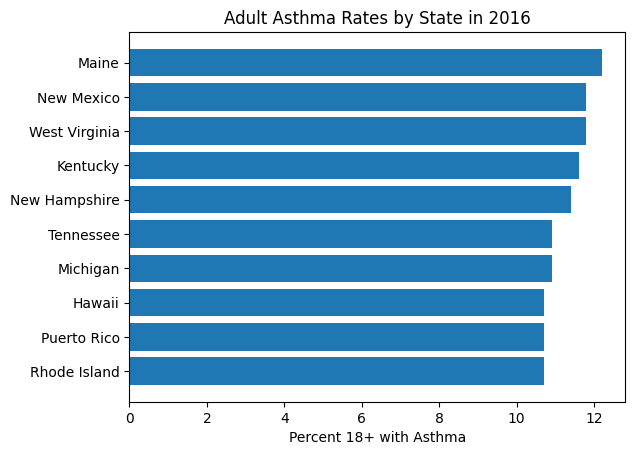

In [209]:
# Run this cell without changes
names = df2['LocationDesc']
values = df2['DataValue']
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.barh(names[::-1], values[::-1]) # Values inverted so highest is at top
ax.set_title('Adult Asthma Rates by State in 2016')
ax.set_xlabel('Percent 18+ with Asthma');